In [2]:
# PREDICT WHETHER THE CLIENT WILL SUBSCRIBE TO A TERM DEPOSIT OR NOT

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Text(0.5, 1.0, 'Subscription deposit count')

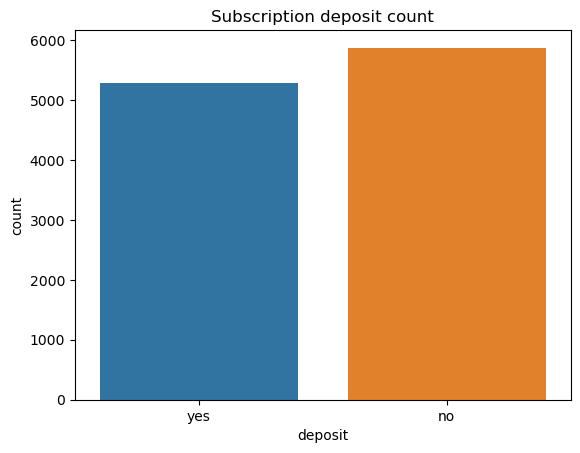

In [6]:
sns.countplot(x='deposit', data=df)
plt.title('Subscription deposit count')

Text(0.5, 1.0, 'Subscription deposit count by marital status')

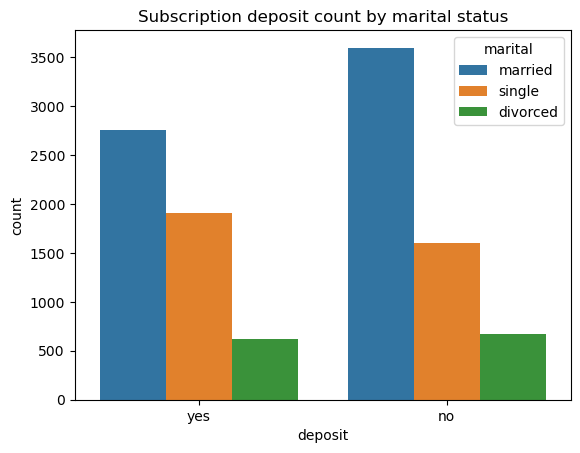

In [7]:
sns.countplot(x='deposit', hue='marital', data=df)
plt.title('Subscription deposit count by marital status')

Text(0.5, 1.0, 'Subscription deposit count by job')

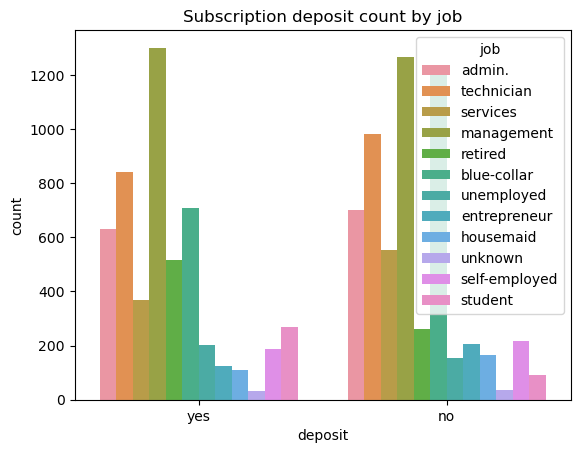

In [8]:
sns.countplot(x='deposit', hue='job', data=df)
plt.title('Subscription deposit count by job')

Text(0.5, 1.0, 'Subscription deposit by education')

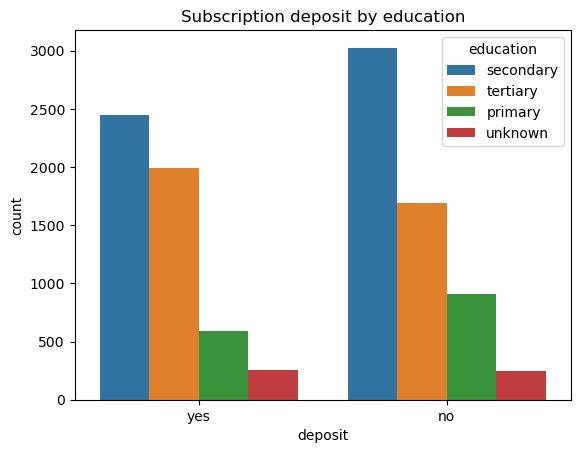

In [9]:
sns.countplot(x='deposit', hue='education', data=df)
plt.title('Subscription deposit by education')

<Axes: ylabel='Frequency'>

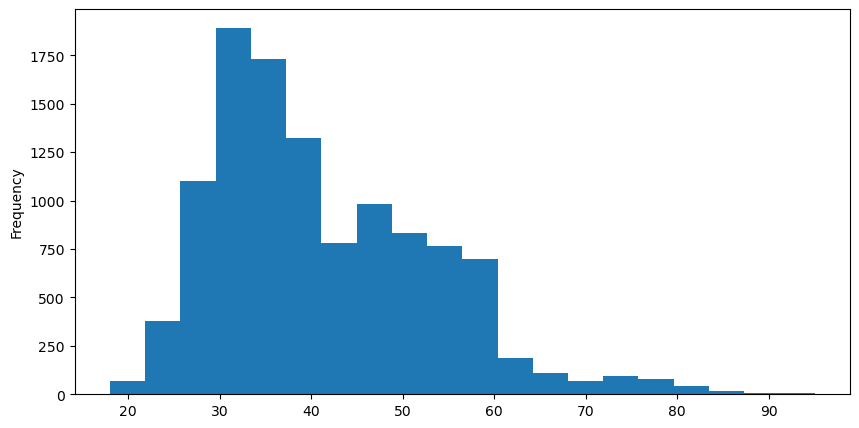

In [10]:
df['age'].plot.hist(bins=20, figsize=(10,5))

Text(0.5, 1.0, 'Scatter Plot of Age vs deposit')

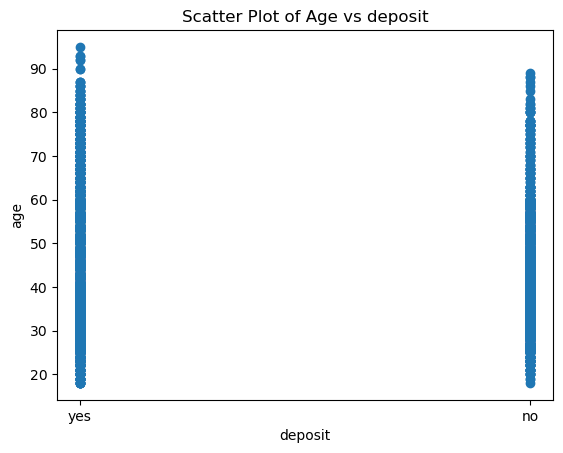

In [11]:
plt.scatter(df['deposit'], df['age'])
plt.xlabel('deposit')
plt.ylabel('age')
plt.title('Scatter Plot of Age vs deposit')

In [12]:
name = df.groupby('age')['balance'].sum().reset_index()
name

,age,balance
0,18,1896
1,19,3681
2,20,20264
3,21,31926
4,22,40559
...,...,...
71,89,553
72,90,713
73,92,1550
74,93,1550


Text(0.5, 1.0, 'Scatter plot of balance against age')

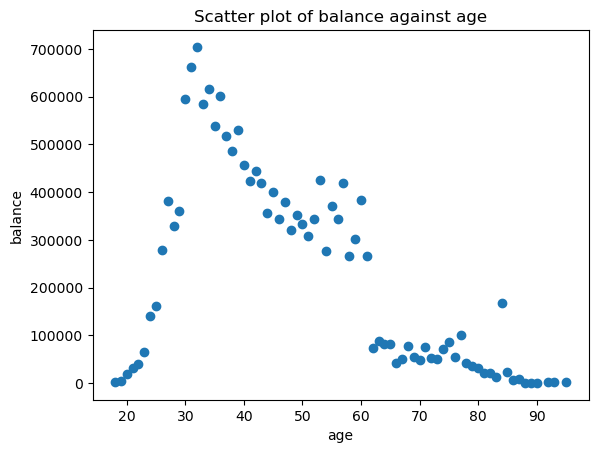

In [13]:
plt.scatter(name['age'], name['balance'])
plt.xlabel('age')
plt.ylabel('balance')
plt.title('Scatter plot of balance against age')

In [14]:
dep = df['deposit'].value_counts()
dep

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [15]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [16]:
name2 = df.groupby('deposit')['age'].mean().reset_index()
name2

,deposit,age
0,no,40.837391
1,yes,41.670070


Text(0.5, 1.0, 'Average Age by Deposit Subscription Outcome')

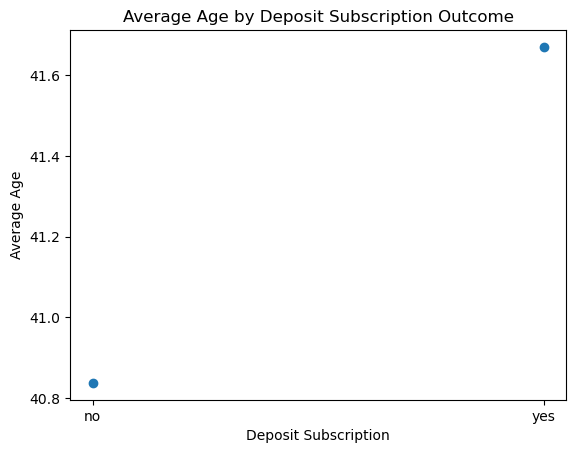

In [17]:
plt.scatter(name2['deposit'], name2['age'])
plt.xlabel('Deposit Subscription')
plt.ylabel('Average Age')
plt.title('Average Age by Deposit Subscription Outcome')

In [18]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [19]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [20]:
name3 = df.groupby(['deposit', 'loan'])['age'].mean().reset_index()
name3

,deposit,loan,age
0,no,no,40.867061
1,no,yes,40.688525
2,yes,no,41.896982
3,yes,yes,39.417355


<Axes: xlabel='deposit', ylabel='count'>

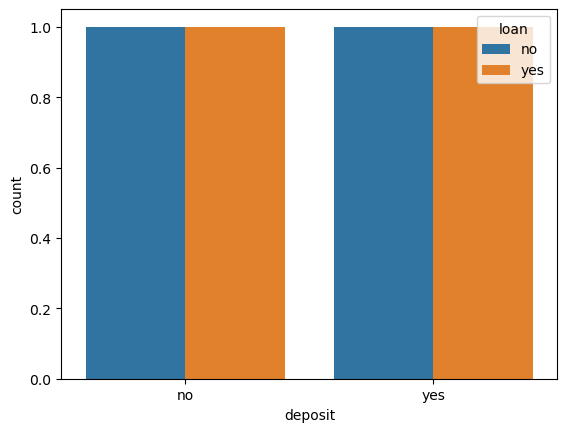

In [21]:
#plt.scatter(name3['deposit'], name3['loan'], name3['age'])
sns.countplot(x='deposit',hue='loan',data=name3)

In [22]:
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
df['education'] == 'secondary' 

0         True
1         True
2         True
3         True
4        False
         ...  
11157    False
11158     True
11159     True
11160     True
11161     True
Name: education, Length: 11162, dtype: bool

In [26]:
job2 = pd.get_dummies(df['job'], dtype=int, drop_first=True)
job2

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11157,1,0,0,0,0,0,0,0,0,0,0
11158,0,0,0,0,0,0,1,0,0,0,0
11159,0,0,0,0,0,0,0,0,1,0,0
11160,0,0,0,0,0,0,0,0,1,0,0


In [27]:
marital2 = pd.get_dummies(df['marital'], dtype=int, drop_first=True)
marital2

,married,single
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
11157,0,1
11158,1,0
11159,0,1
11160,1,0


In [28]:
education2 = pd.get_dummies(df['education'], dtype=int, drop_first=True)
education2

,secondary,tertiary,unknown
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
11157,0,0,0
11158,1,0,0
11159,1,0,0
11160,1,0,0


In [29]:
default2 = pd.get_dummies(df['default'], dtype=int, drop_first=True)
default2

,yes
0,0
1,0
2,0
3,0
4,0
...,...
11157,0
11158,0
11159,0
11160,0


In [30]:
housing2 = pd.get_dummies(df['housing'], dtype=int, drop_first=True)
housing2

,yes
0,1
1,0
2,1
3,1
4,0
...,...
11157,1
11158,0
11159,0
11160,0


In [31]:
loan2 = pd.get_dummies(df['loan'], dtype=int, drop_first=True)
loan2

,yes
0,0
1,0
2,0
3,0
4,0
...,...
11157,0
11158,0
11159,0
11160,1


In [32]:
contact2 = pd.get_dummies(df['contact'], dtype=int, drop_first=True)
contact2

,telephone,unknown
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
11157,0,0
11158,0,1
11159,0,0
11160,0,0


In [33]:
month2 = pd.get_dummies(df['month'], dtype=int, drop_first=True)
month2

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11157,0,0,0,0,0,0,0,0,0,0,0
11158,0,0,0,0,0,1,0,0,0,0,0
11159,1,0,0,0,0,0,0,0,0,0,0
11160,0,0,0,0,0,0,0,1,0,0,0


In [34]:
poutcome2 = pd.get_dummies(df['poutcome'], dtype=int, drop_first=True)
poutcome2

,other,success,unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
11157,0,0,1
11158,0,0,1
11159,0,0,1
11160,0,0,0


In [35]:
df = pd.concat([df,job2,marital2,education2,default2,housing2,loan2,contact2,month2,poutcome2], axis=1)

In [36]:
df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], axis=1, inplace=True)

In [37]:
df.head(5)

,age,balance,day,duration,campaign,pdays,previous,deposit,blue-collar,entrepreneur,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
0,59,2343,5,1042,1,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1


In [38]:
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

In [39]:
df

,age,balance,day,duration,campaign,pdays,previous,deposit,blue-collar,entrepreneur,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,83,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
X = df.drop('deposit', axis=1)
X

,age,balance,day,duration,campaign,pdays,previous,blue-collar,entrepreneur,housemaid,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,83,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
y = df['deposit']
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logmodel = LogisticRegression(max_iter=10000)

In [46]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [47]:
predictions = logmodel.predict(X_test)

In [48]:
from sklearn.metrics import classification_report

In [49]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.85      0.84      1165\n           1       0.83      0.80      0.81      1068\n\n    accuracy                           0.83      2233\n   macro avg       0.83      0.83      0.83      2233\nweighted avg       0.83      0.83      0.83      2233\n'

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(y_test, predictions)

array([[996, 169],
       [218, 850]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test, predictions) 

0.8266905508284819

In [54]:
accuracy_score(y_test, predictions) * 100

82.66905508284819

Text(0.5, 1.0, 'True vs. Predicted Bank Loan')

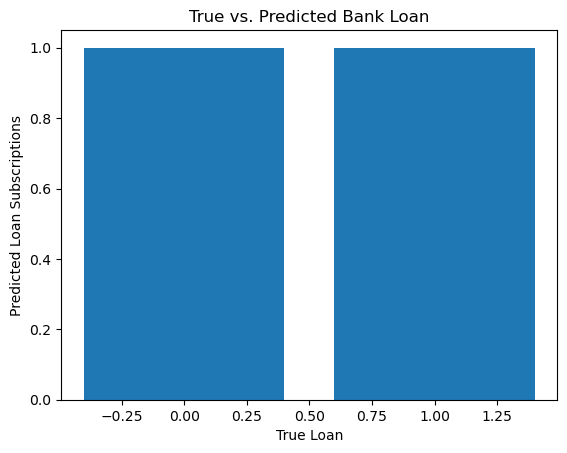

In [58]:
plt.bar(y_test, predictions)
plt.xlabel('True Loan')
plt.ylabel('Predicted Loan Subscriptions')
plt.title('True vs. Predicted Bank Loan')
